<a href="https://colab.research.google.com/github/veeruamma/Time-Series-Forecasting/blob/main/Statastic%20models/Auto_Regression_(AR)Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install statsmodels --upgrade 

     |████████████████████████████████| 9.5MB 8.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
ROOT = "/content/drive/MyDrive/LEARNING/Time Series Forecasting"

import os
os.chdir(ROOT)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.ar_model import AutoReg

# Import data 

In [20]:
df = pd.read_csv('dataset/min_temp.csv', index_col=0, parse_dates=True, na_filter=False)
X = df.values

print('Shape of Data \t', df.shape)
print('Original Dataset: \n', df.head())
print('After extracting only temperature :\n', X)


Shape of Data 	 (3650, 1)
Original Dataset: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After extracting only temperature :
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


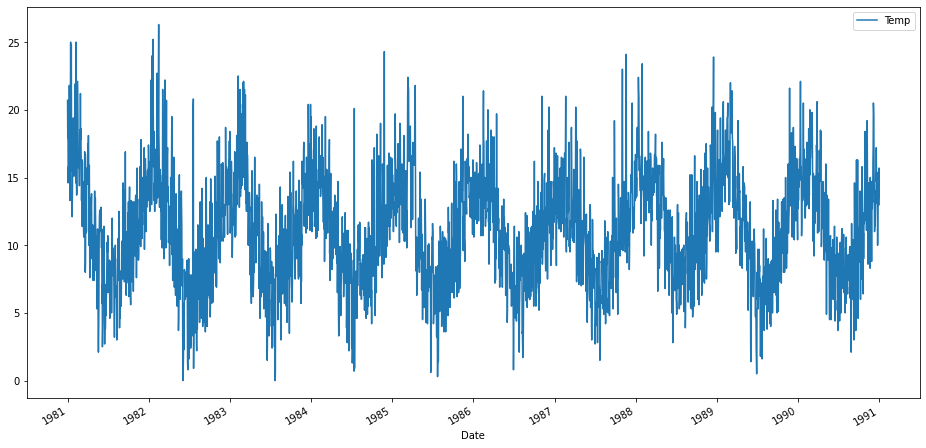

In [27]:
df.plot(figsize=(16,8))

#Check the stationality of the data to build time series model 

Basically, Stationality means the following statictical properties should be
1. Constant mean
2. Constant variance
3. Shuouldn't have any repearig patterns / not seasonal or trends

In [31]:
#Augmented Dickey Fuller test and important 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Temp'], autolag='AIC')

print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1]) 
print("3. No of Lags : ", dftest[2])
print("4. No of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ", dftest[5])
for key, val in dftest[4].items():
  print("\t ", key, " : ", val)

1. ADF :  -4.423328617895281
2. P-Value :  0.00026985085320645473
3. No of Lags :  20
4. No of Observations used for ADF Regression and Critical Values Calculation :  3629
5. Critical Values :  16783.078991354232
	  1%  :  -3.4321532327220154
	  5%  :  -2.862336767636517
	  10%  :  -2.56719413172842


##important for interpretation p-probability value if it's high then time series is non stationary basically if it's >0.5 then it's non stationary if it's less than 0.5 then it's stationary, SO LOWER THE P VALUE, it's better

#If you look at the above plot then you can see that it looks like having repeated patterns and how it can be stationary.. right??

##Actually that is compressed view that's why we can see kind of patterns. but if you look into closer on selected values such as 200 then we can observe in the following plot

### We don't see any repeating patterns as such. Hence it's important to go for statistical test rather depending upon just visula aspects








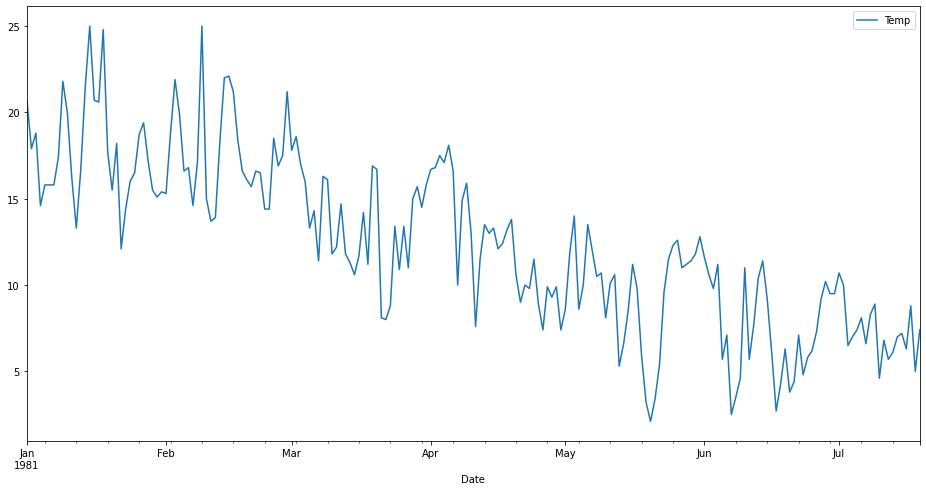

In [34]:
df[:200].plot(figsize=(16,8))

### for AR, we use past values to make future predictions but how many past values should be considered? that needs to be calculated. 

###For that we use auto-correlation and more specifically, we use  **Partial Auto-Correlation for AR model** 


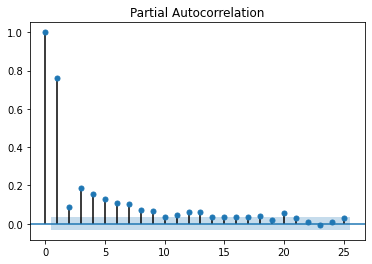

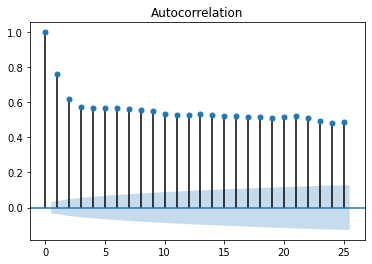

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(df['Temp'], lags =25)
acf = plot_acf(df['Temp'], lags =25)

### ACF gives high values for all the lags as it gives both direct and indirect effects of previous lags where as we can see PACF gives only direct effect of previous lags hence we can see only few high values in ACPF plot may be we can consider upto 10 time lags as they have kind of higher values




#Splitting of dataset into train and test : last 7 days as testing set

In [42]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [43]:
model = AutoReg(train, lags=10).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [44]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8448.843
Method:               Conditional MLE   S.D. of innovations              2.476
Date:                Tue, 29 Jun 2021   AIC                              1.820
Time:                        04:22:09   BIC                              1.840
Sample:                            10   HQIC                             1.827
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9759      0.146      6.698      0.000       0.690       1.262
y.L1           0.5889      0.017     35.510      0.000       0.556       0.621
y.L2          -0.0693      0.019     -3.605      0.0

In [45]:
print(len(train))

3643


#Make Predictions on Test Set and Compare

In [46]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

[11.55706224 12.67035469 13.07800296 13.02039788 12.79995721 12.65800547
 12.43673592]


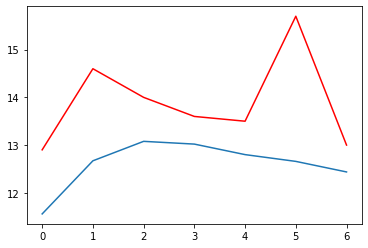

In [47]:
plt.plot(pred)
plt.plot(test, color='red')
print(pred)

#Calculate the error

In [48]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [49]:
print(rmse)

1.5479981117832655


#Making Future Predictions

In [51]:
pred_future = model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print("No of predictions made : \t", len(pred_future))

The future prediction for the next week
[12.29193706 12.21405058 12.26025358 12.31091863 12.3116787  12.26846418
 12.21477401]
No of predictions made : 	 7


In [57]:
pred

array([11.55706224, 12.67035469, 13.07800296, 13.02039788, 12.79995721,
       12.65800547, 12.43673592])

In [61]:
cur_fut_pred = np.concatenate((pred, pred_future), axis=0)

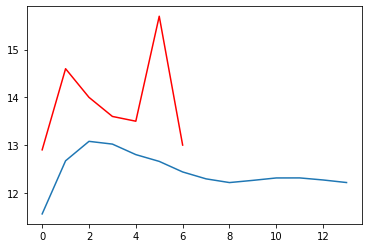

In [62]:
plt.plot(cur_fut_pred)
plt.plot(test, color='red')